# Tamil nadu crop production

## Filtering and preprocessing data set

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import *
from ipywidgets import *
import warnings


In [2]:
warnings.simplefilter(action='ignore',category=FutureWarning)
cp=pd.read_csv('/content/drive/MyDrive/Mycolllections/Tamilnadu agriculture yield data.csv')

In [3]:
cp.columns

Index(['State_Name', 'District_Name', 'Crop_Year', 'Season', 'Crop', 'Area',
       'Production'],
      dtype='object')

In [4]:
d9=cp.loc[cp['Crop_Year']==2009]
d9.shape

(809, 7)

In [5]:
d10=cp.loc[cp['Crop_Year']==2010]
d10.shape

(363, 7)

In [6]:
d11=cp.loc[cp['Crop_Year']==2011]
d11.shape

(921, 7)

In [7]:
d12=cp.loc[cp['Crop_Year']==2012]
d12.shape

(361, 7)

In [8]:
d13=cp.loc[cp['Crop_Year']==2013]
d13.shape

(1043, 7)

In [9]:
global df
df=pd.concat([d9,d10,d11,d12,d13])


In [10]:
x=df.loc[df['Crop']=='Coconut'].index
df.drop(x,inplace=True)


In [11]:
df.isnull().sum()

State_Name        0
District_Name     0
Crop_Year         0
Season            0
Crop              0
Area              0
Production       71
dtype: int64

In [12]:
df=df.dropna()
df.shape

(3333, 7)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3333 entries, 22 to 13546
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     3333 non-null   object 
 1   District_Name  3333 non-null   object 
 2   Crop_Year      3333 non-null   int64  
 3   Season         3333 non-null   object 
 4   Crop           3333 non-null   object 
 5   Area           3333 non-null   int64  
 6   Production     3333 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 208.3+ KB


In [14]:
df.duplicated().sum() #this show no data is repeated

0

In [15]:
df=df.reset_index()
df=df.drop(['index'],axis=1)
df=df.drop(['State_Name'],axis=1)

In [16]:
dic_list=df.District_Name.unique().tolist()
dic_list.sort()
dic_list.insert(0,'NONE')
year_list=df.Crop_Year.unique().tolist()
year_list.sort()
year_list.insert(0,'NONE')
sea_list=df.Season.unique().tolist()
sea_list.sort()
sea_list.insert(0,'NONE')
crp_list=df.Crop.unique().tolist()
crp_list.sort()
crp_list.insert(0,'NONE')


## Visualzation

In [17]:
#sample data top 5 rows         #production of sugarcane for one hectare is 100 tons
df.head()                       #production of rice for one hectare is 9tons

,District_Name,Crop_Year,Season,Crop,Area,Production
0,ARIYALUR,2009,Kharif,Rice,25978,80462.0
1,ARIYALUR,2009,Kharif,Small millets,404,649.0
2,ARIYALUR,2009,Whole Year,Arhar/Tur,160,122.0
3,ARIYALUR,2009,Whole Year,Bajra,644,1082.0
4,ARIYALUR,2009,Whole Year,Banana,134,5761.0


In [18]:
# basic stats of the data set
round(df.describe())

,Crop_Year,Area,Production
count,3333.0,3333.0,3333.0
mean,2011.0,6063.0,72817.0
std,2.0,17850.0,423836.0
min,2009.0,1.0,0.0
25%,2010.0,57.0,66.0
50%,2011.0,638.0,810.0
75%,2013.0,3856.0,10486.0
max,2013.0,186307.0,10598908.0


District wise overall prodution of all crops

Text(0.5, 1.0, 'production of each district irespective of corp type ')

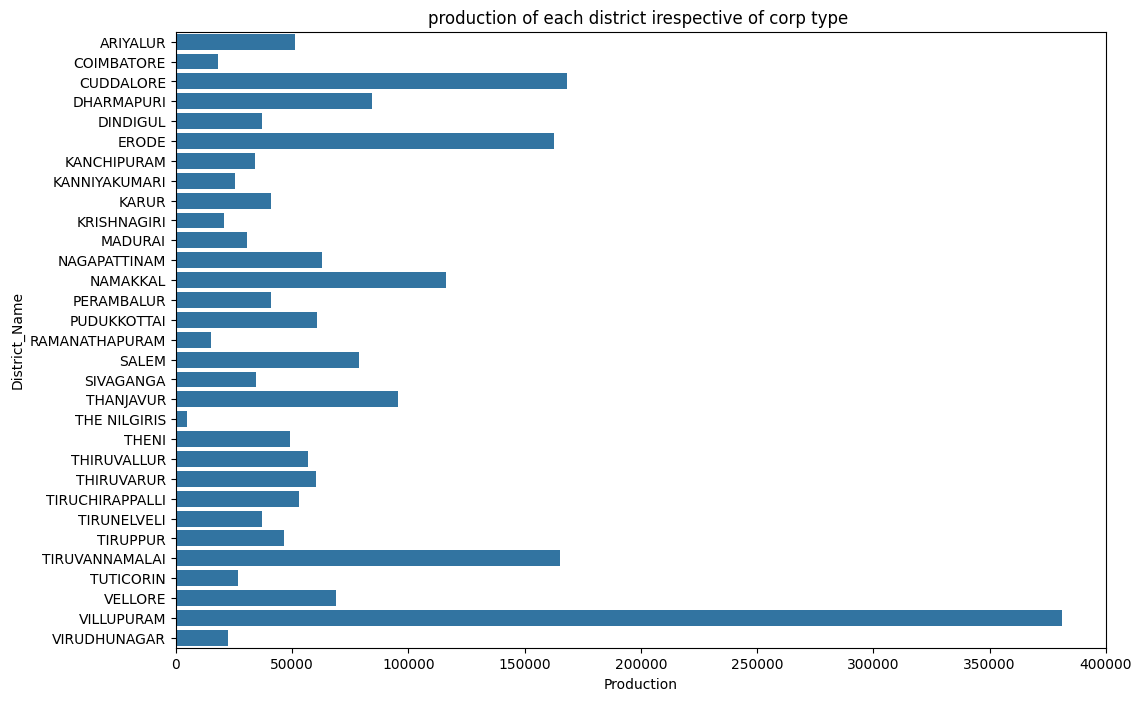

In [19]:
# production of each district's for overall crops
plt.figure(figsize=(12, 8))
sns.barplot(ci=False,
            data=df,
            y='District_Name',
            x='Production'
            )
plt.title("production of each district irespective of corp type ")

select a district to view overall production and season wise production

Dropdown(description='Dictrict', options=('NONE', 'ARIYALUR', 'COIMBATORE', 'CUDDALORE', 'DHARMAPURI', 'DINDIG…

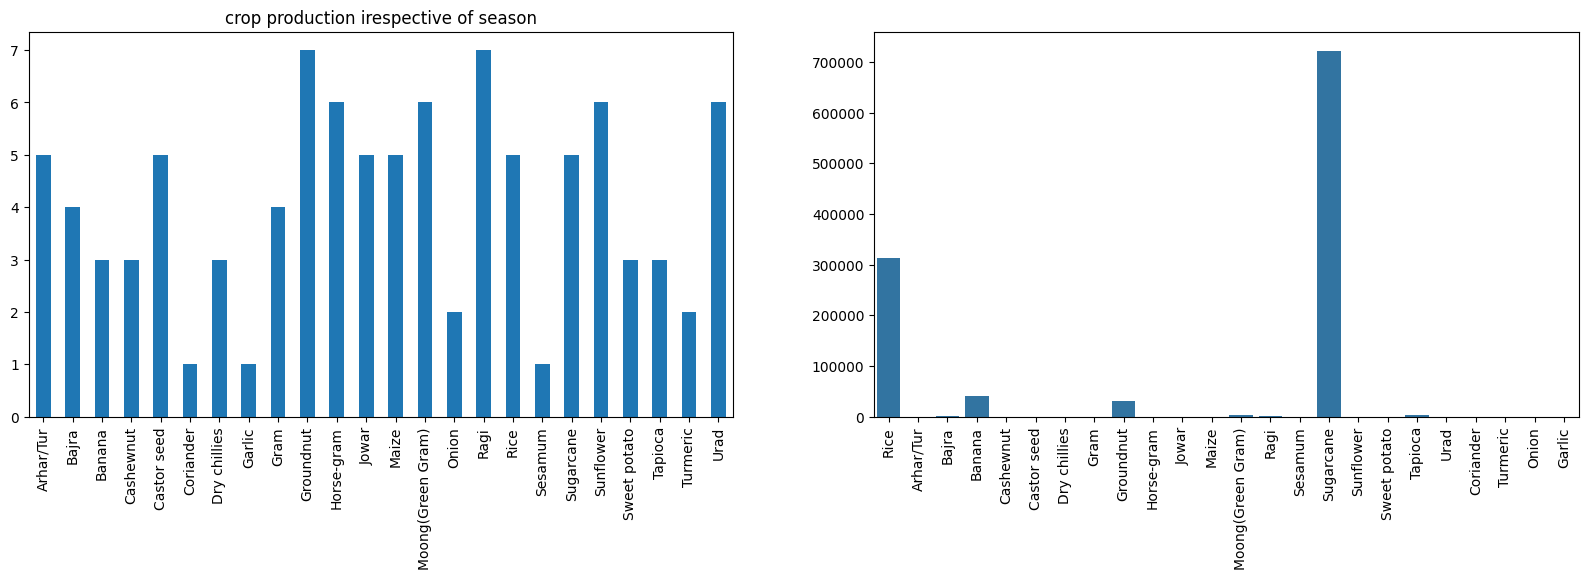

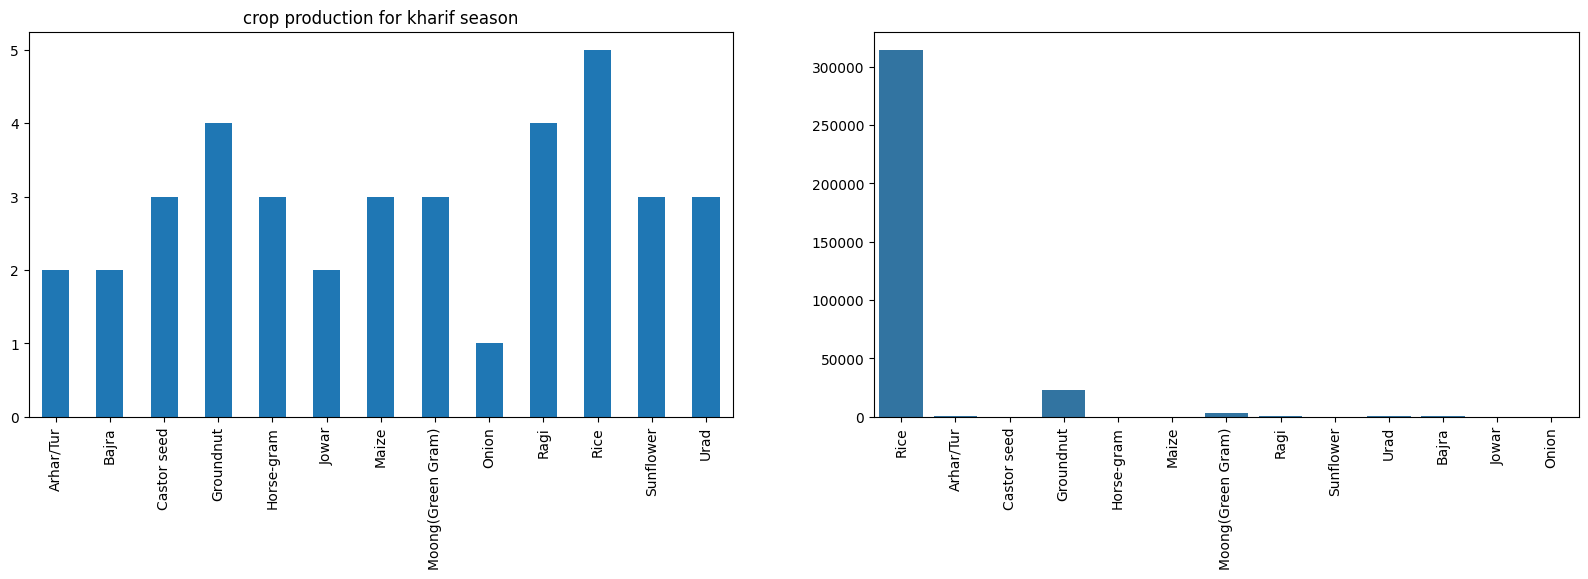

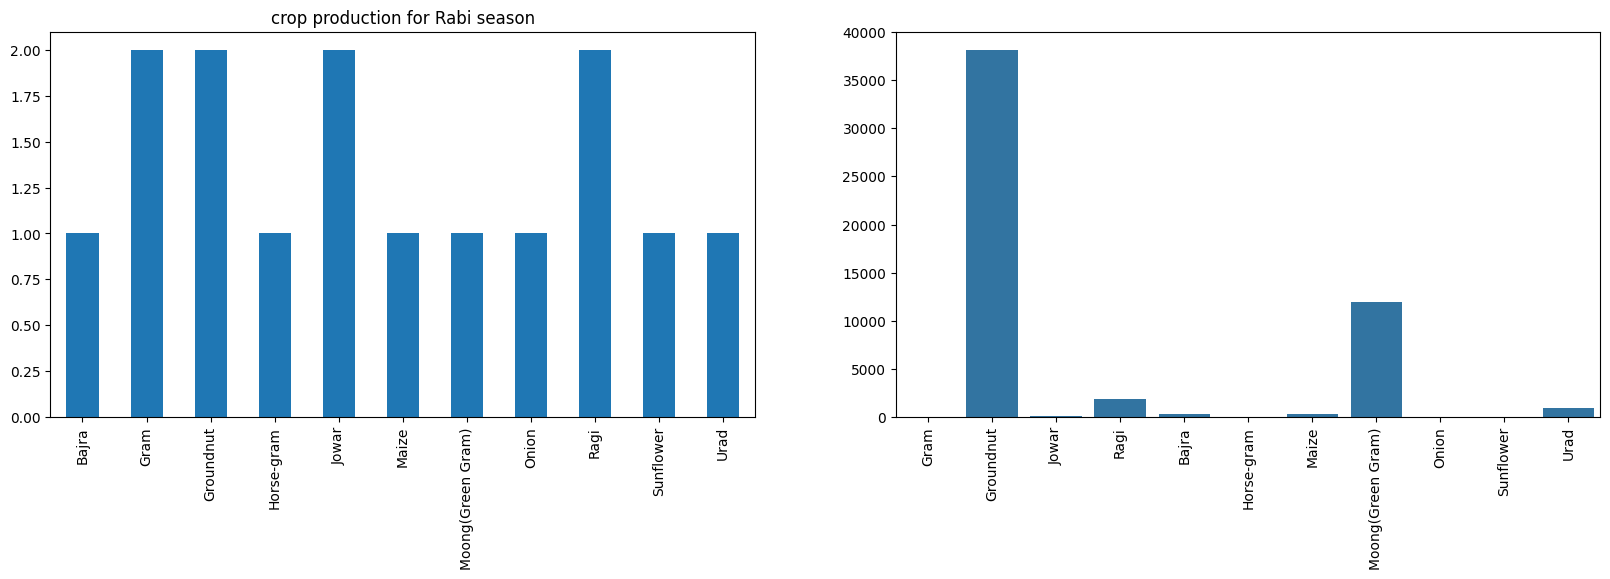

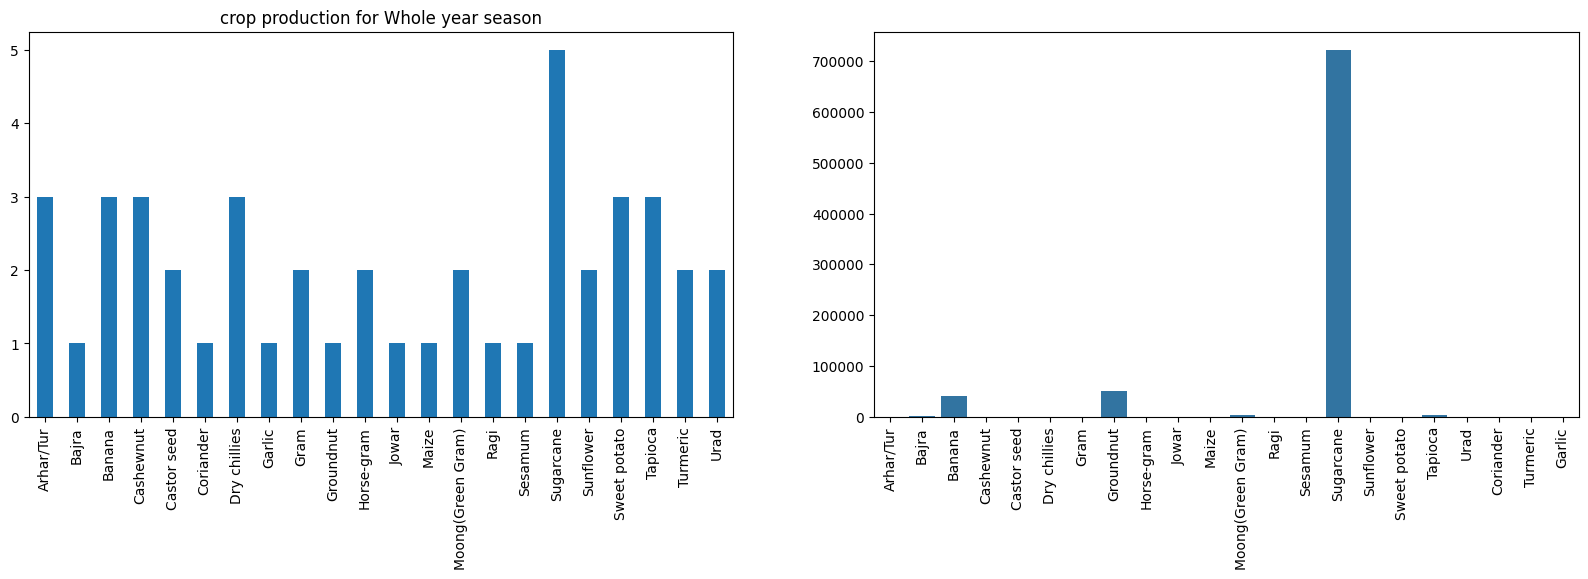

In [20]:
# District wise contribution irrespective of crops

dd1=Dropdown(options=dic_list,value='NONE',description='Dictrict')
display(dd1)

#funtion
def on_change(change):
  if change['type']=='change' and change['name']=='value':
    dic=change['new']
    # code the needed statement down

    cf=df.loc[df['District_Name']==dic]
    cf_kharif=cf.loc[cf['Season']=='Kharif']
    cf_rabi=cf.loc[cf['Season']=='Rabi']
    cf_Whyear=cf.loc[cf['Season']=='Whole Year']

    #plot district crop production irespective of season
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title('crop production irespective of season')
    cf.groupby('Crop').size().plot(kind='bar')
    plt.xlabel('')
    plt.ylabel('')
    plt.subplot(1,2,2)
    sns.barplot(ci=False,data=cf,y='Production',x='Crop')
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=90);

    #ploting subplot for Three season
    #Kharif
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title('crop production for kharif season')
    cf_kharif.groupby('Crop').size().plot(kind='bar')
    plt.xlabel('')
    plt.ylabel('')
    plt.subplot(1,2,2)
    sns.barplot(ci=False,data=cf_kharif,y='Production',x='Crop')
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=90);

    #Rabi
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title('crop production for Rabi season')
    cf_rabi.groupby('Crop').size().plot(kind='bar')
    plt.xlabel('')
    plt.ylabel('')
    plt.subplot(1,2,2)
    sns.barplot(ci=False,data=cf_rabi,y='Production',x='Crop')
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=90);

    #Whole year
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title('crop production for Whole year season')
    cf_Whyear.groupby('Crop').size().plot(kind='bar')
    plt.xlabel('')
    plt.ylabel('')
    plt.subplot(1,2,2)
    sns.barplot(ci=False,data=cf_Whyear,y='Production',x='Crop')
    plt.xlabel('')
    plt.ylabel('')
    plt.xticks(rotation=90);

dd1.observe(on_change)

<Axes: >

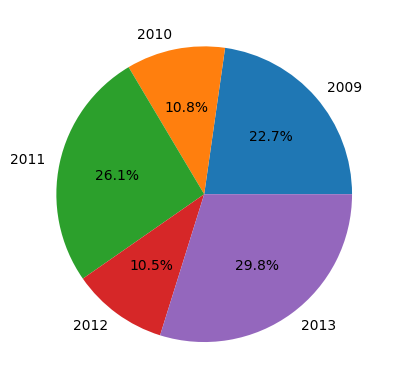

In [21]:
#count of data records in each year
df.groupby('Crop_Year').size().plot(kind='pie',autopct='%.1f%%')

<Axes: xlabel='Crop_Year'>

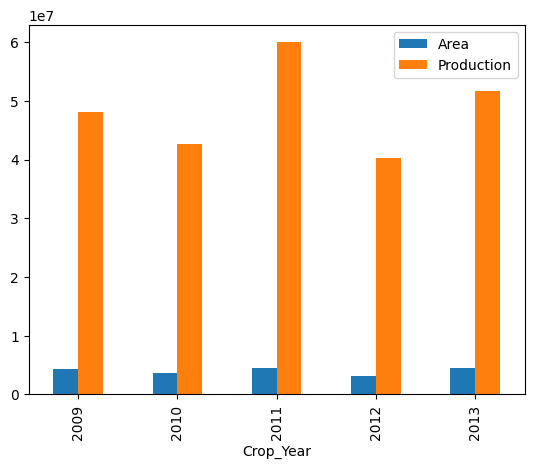

In [22]:
# summation of total production and area grouped for each year
df.groupby('Crop_Year').sum().plot(kind='bar')

select a year to see district wise production and each crop production

In [23]:
dd2=Dropdown(options=year_list,value='NONE',description='Select a year')
display(dd2)

def on_change1(change):
  if change['type']=='change' and change['name']=='value':
    yr=change['new']

    cf=df.loc[df['Crop_Year']==yr]
    cf_kharif=cf.loc[cf['Season']=='Kharif']
    cf_rabi=cf.loc[cf['Season']=='Rabi']
    cf_Whyear=cf.loc[cf['Season']=='Whole Year']
    #plotings
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title('Crop production by each district for the selected year')
    sns.barplot(ci=False,data=cf,y='Production',x='District_Name')
    plt.xticks(rotation=90);
    plt.xlabel('')
    plt.ylabel('')
    plt.subplot(1,2,2)
    sns.barplot(ci=False,data=cf,y='Production',x='Crop')
    plt.xticks(rotation=90);
    plt.xlabel('')
    plt.ylabel('')
#kharif season
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title('Crop production in Kharif season for the year')
    sns.barplot(ci=False,data=cf_kharif,y='Production',x='District_Name')
    plt.xticks(rotation=90);
    plt.xlabel('')
    plt.ylabel('')
    plt.subplot(1,2,2)
    sns.barplot(ci=False,data=cf_kharif,y='Production',x='Crop')
    plt.xticks(rotation=90);
    plt.xlabel('')
    plt.ylabel('')
#Rabi
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title('Crop production in rabi season for the year')
    sns.barplot(ci=False,data=cf_rabi,y='Production',x='District_Name')
    plt.xticks(rotation=90);
    plt.xlabel('')
    plt.ylabel('')
    plt.subplot(1,2,2)
    sns.barplot(ci=False,data=cf_rabi,y='Production',x='Crop')
    plt.xticks(rotation=90);
    plt.xlabel('')
    plt.ylabel('')
#whole year
    plt.figure(figsize=(20,5))
    plt.subplot(1,2,1)
    plt.title('Crop production in whole year for the year')
    sns.barplot(ci=False,data=cf_Whyear,y='Production',x='District_Name')
    plt.xticks(rotation=90);
    plt.xlabel('')
    plt.ylabel('')
    plt.subplot(1,2,2)
    sns.barplot(ci=False,data=cf_Whyear,y='Production',x='Crop');
    plt.xticks(rotation=90);
    plt.xlabel('');
    plt.ylabel('');



dd2.observe(on_change1)

Dropdown(description='Select a year', options=('NONE', 2009, 2010, 2011, 2012, 2013), value='NONE')

Select a crop type to see its prodution

In [24]:
dd10=Dropdown(options=crp_list,value='NONE',description='Select a crop')
btn3=widgets.Button(description='SUBMIT')
display(dd10)
display(btn3)

def fun(arg):
  crp=dd10.value
  print(crp)
  cf2=df.loc[df['Crop']==crp]
  x=cf2.groupby('Crop_Year')['Production'].sum()
  y=cf2.groupby('Crop_Year')['Area'].sum()
  display(x,y)

  # display(cf2)

  plt.figure(figsize=(15,5))
  plt.subplot(1,2,1)
  plt.title('production for each year')
  x.plot(kind='bar')
  plt.xlabel('')
  plt.ylabel("in Tons")
  plt.subplot(1,2,2)
  plt.title('Area utilsed for each year')
  y.plot(kind='pie',autopct='%.1f%%')
  plt.ylabel(" ")


  plt.figure(figsize=(22,8))
  plt.subplot(1,2,1)
  plt.title('Which are the district produce this crop and production level')
  sns.barplot(ci=False,data=cf2,y='District_Name',x='Production')
  plt.ylabel('')
  plt.subplot(1,2,2)
  plt.title('how much produced in each season')
  cf2.groupby('Season')['Production'].sum().plot(kind='pie',autopct='%.f%%')
  plt.ylabel('')


btn3.on_click(fun)

Dropdown(description='Select a crop', options=('NONE', 'Arecanut', 'Arhar/Tur', 'Bajra', 'Banana', 'Black pepp…

Button(description='SUBMIT', style=ButtonStyle())

Filter based on the year district season

In [25]:

dd3=Dropdown(options=year_list,value='NONE',description='Select a year')
dd4=Dropdown(options=dic_list,value='NONE',description='District')
dd5=Dropdown(options=sea_list,value='NONE',description='Season')
btn1=widgets.Button(description='SUBMIT')
display(dd3)
display(dd4)
display(dd5)
display(btn1)



def fun(arg):
  yr=dd3.value
  dic=dd4.value
  sea=dd5.value
  print(yr)
  print(dic)
  print(sea)

  if yr!='NONE':
    cf2=df.loc[df['Crop_Year']==yr]
  else:
    cf2=df

  if dic!='NONE':
    cf2=cf2.loc[cf2['District_Name']==dic]

  if sea!='NONE':
    cf2=cf2.loc[cf2['Season']==sea]

    size=cf2.size

  print('====================================================================================================')
  # display(cf2)
  # print(cf2.shape)

  print('Visualization for the selected data' )
  print('====================================================================================================')

  sns.barplot(ci=False,data=cf2,y='Crop',x='Production')


btn1.on_click(fun)

Dropdown(description='Select a year', options=('NONE', 2009, 2010, 2011, 2012, 2013), value='NONE')

Dropdown(description='District', options=('NONE', 'ARIYALUR', 'COIMBATORE', 'CUDDALORE', 'DHARMAPURI', 'DINDIG…

Dropdown(description='Season', options=('NONE', 'Kharif', 'Rabi', 'Whole Year'), value='NONE')

Button(description='SUBMIT', style=ButtonStyle())

Filter based on the crop year season

In [26]:


dd6=Dropdown(options=crp_list,value='NONE',description='Select a crop')
dd7=Dropdown(options=year_list,value='NONE',description='Select year')
dd9=Dropdown(options=dic_list,value='NONE',description='District')
dd8=Dropdown(options=sea_list,value='NONE',description='Season')
btn2=widgets.Button(description='SUBMIT')
display(dd6)
display(dd7)
display(dd9)
display(dd8)
display(btn2)



def fun(arg):
  crp=dd6.value
  yr=dd7.value
  dic=dd9.value
  sea=dd8.value
  print(crp)
  print(yr)
  print(dic)
  print(sea)

  if crp!='NONE':
    cf2=df.loc[df['Crop']==crp]
  else:
    cf2=df

  if yr!='NONE':
    cf2=cf2.loc[cf2['Crop_Year']==yr]

  if dic!='NONE':
    cf2=cf2.loc[cf2['District_Name']==dic]

  if sea!='NONE':
    cf2=cf2.loc[cf2['Season']==sea]


  # display(cf2)
  # print(cf2.size)


  if cf2.size>0:

    plt.figure(figsize=(7,7))
    sns.barplot(ci=False,data=cf2,y='District_Name',x='Production')
    print('====================================================================================================')
  else:
    print('======================================')
    print('NO DATA FOUND')
    print('======================================')



btn2.on_click(fun)

Dropdown(description='Select a crop', options=('NONE', 'Arecanut', 'Arhar/Tur', 'Bajra', 'Banana', 'Black pepp…

Dropdown(description='Select year', options=('NONE', 2009, 2010, 2011, 2012, 2013), value='NONE')

Dropdown(description='District', options=('NONE', 'ARIYALUR', 'COIMBATORE', 'CUDDALORE', 'DHARMAPURI', 'DINDIG…

Dropdown(description='Season', options=('NONE', 'Kharif', 'Rabi', 'Whole Year'), value='NONE')

Button(description='SUBMIT', style=ButtonStyle())